In [1]:
import pandas as pd
from scipy.stats import binom_test, fisher_exact
from genepy.utils import helper as h 
from genepy.utils import plot
from genepy.imaging import fish
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact, chi2_contingency, ttest_ind
from scipy.spatial import distance_matrix
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

## Processing the data

In [2]:
project='FishSuperResColoc'
version='v2'

In [3]:
rename = {
"Text Between Delimiters":"subset",
"Folder Short":"folder_short",
"Folder Path":"folder",
"Source.Name":"name",
"ImageDocumentName::Image Name":"image",
"ParentID::ID of the parent!!I":"parent_id",
"ID::ID!!I":"id",
"RegionsCount::Count!!I": "count",
"ImageSceneName::Image Scene Name ":"scene",
"Area1::Area Unscaled!!R":"area_u",
"Area::Area!!R": "area",
"CenterX1::Center X Unscaled!!R":"x",
"CenterY1::Center Y Unscaled!!R":"y",
"ImageScaleX::Image Scale X!!R":"scale_x",
"ImageScaleY::Image Scale Y!!R":"scale_y",
"ImageIndexZ::Image Index Z!!I":"z",
'Classes 5 RegionsCount ::Classes 5 Count!!I':"count_red",
'Classes 9 RegionsCount ::Classes 9 Count!!I':"count_green",
"ClassColorName::Region Class Color Name": "class",
"IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R":"max_red",
"IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R":"max_tv2_t1",
"IntensityMaximum_TV2-T2-SR::Intensity Maximum of channel 'TV2-T2-SR'!!R":"max_green",
"IntensityMaximum_TV2-T3-SR::Intensity Maximum of channel 'TV2-T3-SR'!!R":"max_dapi",
"IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R":"mean_red",
"IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R":"mean_tv2_t1",
"IntensityMean_TV2-T2-SR::Intensity Mean Value of channel 'TV2-T2-SR'!!R":"mean_green",
"IntensityMean_TV2-T3-SR::Intensity Mean Value of channel 'TV2-T3-SR'!!R":"mean_dapi",
"IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R":"min_red",
"IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R":"min_tv2_t1",
"IntensityMinimum_TV2-T2-SR::Intensity Minimum of channel 'TV2-T2-SR'!!R":"min_green",
"IntensityMinimum_TV2-T3-SR::Intensity Minimum of channel 'TV2-T3-SR'!!R":"min_dapi",
"IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R":"pixsum_red",
"IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R":"pixsum_tv2_t1",
"IntensitySum0_TV2-T2-SR::Intensity Pixel Count of channel 'TV2-T2-SR'!!R":"pixsum_green",
"IntensitySum0_TV2-T3-SR::Intensity Pixel Count of channel 'TV2-T3-SR'!!R":"pixsum_dapi",
"IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R":"range_red",
"IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R":"range_tv2_t1",
"IntensityRange_TV2-T2-SR::Intensity Range of channel 'TV2-T2-SR'!!R":"range_green",
"IntensityRange_TV2-T3-SR::Intensity Range of channel 'TV2-T3-SR'!!R":"range_dapi",
"IntensityStd_TV1-T1-SR::Intensity Standard Deviation of channel 'TV1-T1-SR'!!R":"std_red",
"IntensityStd_TV2-T1-SR::Intensity Standard Deviation of channel 'TV2-T1-SR'!!R":"std_tv2_t1",
"IntensityStd_TV2-T2-SR::Intensity Standard Deviation of channel 'TV2-T2-SR'!!R":"std_green",
"IntensityStd_TV2-T3-SR::Intensity Standard Deviation of channel 'TV2-T3-SR'!!R":"std_dapi",
"IntensitySum1_TV1-T1-SR::Intensity Sum of channel 'TV1-T1-SR'!!R":"sum_red",
"IntensitySum1_TV2-T1-SR::Intensity Sum of channel 'TV2-T1-SR'!!R":"sum_tv2_t1",
"IntensitySum1_TV2-T2-SR::Intensity Sum of channel 'TV2-T2-SR'!!R":"sum_green",
"IntensitySum1_TV2-T3-SR::Intensity Sum of channel 'TV2-T3-SR'!!R":"sum_dapi",
"IntensitySum2_TV1-T1-SR::Intensity Sum Squares of channel 'TV1-T1-SR'!!R":"sum2_red",
"IntensitySum2_TV2-T1-SR::Intensity Sum Squares of channel 'TV2-T1-SR'!!R":"sum2_tv2_t1",
"IntensitySum2_TV2-T2-SR::Intensity Sum Squares of channel 'TV2-T2-SR'!!R":"sum2_green",
"IntensitySum2_TV2-T3-SR::Intensity Sum Squares of channel 'TV2-T3-SR'!!R":"sum2_dapi",
"Unnamed: 27":"unknown"
}

In [80]:
data = pd.read_csv('../data/'+project+'/data_query_files/querry.csv').rename(columns=rename)
data

,subset,folder_short,folder,name,image,parent_id,id,scene,area,x,...,sum_1,sum_2,range_1,range_2,std_1,std_2,sum1_1,sum1_2,sum2_1,sum2_2
0,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,NaN,NaN,NaN,NaN,pixel²,pixel,...,pixel²,pixel²,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown²,Unknown²
1,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,15.0,NaN,7,368.64285714286,...,7,7,1661,4080,547.72403548468,1510.241245314,49094,164490,346117272,3878964986
2,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,16.0,NaN,28,396.21428571429,...,28,28,8089,13818,2760.2006509669,3701.1435641623,123989,523204,754750539,10146373720
3,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,17.0,NaN,13,426.88461538462,...,13,13,4583,6576,1313.3590522016,2101.7813019022,108303,285907,922971237,6340918481
4,Subset10,AAVS1_CRISPR_MED1\AAVS1_CRISPR_MED1 Image7\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Image 7_Subset10_Out_Maximum intensity project...,Image 7_Subset10_Out_Maximum intensity project...,14.0,18.0,NaN,29,340.74137931035,...,29,29,3515,12083,1077.0374837392,3107.8328355138,196046,460225,1357791794,7574132899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117757,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,23.0,NaN,55230,1146.4196089082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117758,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,24.0,NaN,60384,1546.5754835718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117759,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,25.0,NaN,48042,2480.9880521211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117760,Subset9,IF FISH final\Runx2_excel\,C:\Users\M232498\Desktop\Ju\GDrive\IF FISH fin...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,Runx2_488_MYC_FISH_SIM-Orthogonal Projection-0...,1.0,26.0,NaN,70306,1932.6927004808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.columns

Index(['subset', 'folder_short', 'folder', 'name', 'image', 'parent_id', 'id',
       'scene', 'area', 'x', 'y', 'max_1', 'max_2', 'mean_1', 'mean_2',
       'min_1', 'min_2', 'sum_1', 'sum_2', 'range_1', 'range_2', 'std_1',
       'std_2', 'sum1_1', 'sum1_2', 'sum2_1', 'sum2_2'],
      dtype='object')

In [5]:
cat ../data/$project/data_query_files/querry.csv | less

<U+FEFF>Text Between Delimiters,Folder Short,Folder Path,Source.Name,ImageDocumentName::Image Name,ParentID::ID of the parent!!I,ID::ID!!I,ImageSceneName::Image Scene Name ,Area1::Area Unscaled!!R,CenterX1::Center X Unscaled!!R,CenterY1::Center Y Unscaled!!R,IntensityMaximum_TV1-T1-SR::Intensity Maximum of channel 'TV1-T1-SR'!!R,IntensityMaximum_TV2-T1-SR::Intensity Maximum of channel 'TV2-T1-SR'!!R,IntensityMean_TV1-T1-SR::Intensity Mean Value of channel 'TV1-T1-SR'!!R,IntensityMean_TV2-T1-SR::Intensity Mean Value of channel 'TV2-T1-SR'!!R,IntensityMinimum_TV1-T1-SR::Intensity Minimum of channel 'TV1-T1-SR'!!R,IntensityMinimum_TV2-T1-SR::Intensity Minimum of channel 'TV2-T1-SR'!!R,IntensitySum0_TV1-T1-SR::Intensity Pixel Count of channel 'TV1-T1-SR'!!R,IntensitySum0_TV2-T1-SR::Intensity Pixel Count of channel 'TV2-T1-SR'!!R,IntensityRange_TV1-T1-SR::Intensity Range of channel 'TV1-T1-SR'!!R,IntensityRange_TV2-T1-SR::Intensity Range of channel 'TV2-T1-SR'!!R,IntensityStd_TV1-T1-SR::Int

In [ ]:
data.iloc[0].tolist()

In [ ]:
set(data.folder_short)

In [ ]:
cond = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'AAVS1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'AAVS1',
 'IF FISH final\\IRF2BP2_excel\\':'',
 'IF FISH final\\MEF2C_excel\\':'',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MEF2D',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':''}

In [ ]:
prot = {'AAVS1_CRISPR_MED1\\AAVS1_CRISPR_MED1 Image7\\':'MED1',
 'IF FISH final\\AAVS1_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\IRF2BP2_excel\\':'IRF2BP2',
 'IF FISH final\\MEF2C_excel\\':'MEF2C',
 'IF FISH final\\MEF2D_CRISPR_MED1\\':'MED1',
 'IF FISH final\\MEF2D_CRISPR_MEF2D\\':'MEF2D',
 'IF FISH final\\Runx2_excel\\':'RUNX2'}

In [ ]:
data = data[~data.name.str.contains('Classes')]

In [ ]:
data['condition'] = [cond[i] for i in data.folder_short]

In [ ]:
data['protein'] = [prot[i] for i in data.folder_short]

In [ ]:
data['type'] = [i.split('.')[0].split('_')[-1] for i in data.name]

In [ ]:
data['name'] = [cond[i]+'_'+prot[i] for i in data.folder_short]

In [ ]:
set(data.type)

In [ ]:
data = data[~data.id.isna()]

In [ ]:
set(data.subset)

In [ ]:
data = data.drop(columns=['scene','image','folder','folder_short'])

In [ ]:
data['subset'] = [i.split('Subset')[-1] for i in data.subset]

In [ ]:
for val in ['area','x','y','max_1','max_2','mean_1','mean_2','min_1','min_2','range_1','range_2','std_1','std_2','sum_1','sum_2','sum1_1','sum1_2','sum2_1','sum2_2']:
    data[val]= data[val].astype(float)

In [ ]:
for val in ['subset','parent_id','id']:
    data[val] = data[val].astype('int')

In [ ]:
len(data.id)

# results

## why we are not doing a monte carlo but just a hypthesis testing on a binomial

monte carlo would be useful in our case if we did not know the expected distribution.
given a way to generate our distribution (which specific parameters can be learnt from the data) we might be able to express what would be the null hypothesis by estimating this unknown distribution. it is useful for when we don't know the exact distribution or when it is too complex to analytically solve.  

However in our case we can approximate the distribution well enough by a binomial. It is true that given that the dna will not have the same density everywhere on the nucleus, that the dots will have themselves variable intensity and size, which might express or not a multiplicity of points, the distribution is not a binomial. 

But you said yourself that for all purposes we could simplify these hypothesis. 

I also don't think that we have enough data points to correctly estimate the monte carlo parameters. 

A binomial is thus enough for this analysis

### having specificities in the data needing to be modelled:

I found that the data has specific bias that still need to be taken in account while not needing to change the statistics:

the avg size of a MYC dot is 350 whereas the one of a MYC green is 45

In [ ]:
def desc(data):
    return data.sum()/data.mean(),len(data)
# for each group
res = {}
for val in set(data.name):
    print('\n',val)
    group = data[data.name==val]
    space = group[group.type=='Nucleus'].area.sum()
    totsize = group[group.type==' Green Dots'].area.sum()
                 
    coloc,s_coloc = desc(group[group.type=='MYC  Green'].area)
    outside,s_outside = desc(group[group.type=='MYC'].area)
    print('data: \n  - total nucleuses size: '+str(int(space))+'\n  - total Green dot size: '+str(int(totsize))+'\n  - counts for coloc: '+str(int(s_coloc))+'\n  - counts for not coloc: '+str(int(s_outside))) 
    p_in = totsize/space
    isin = coloc/(outside+coloc)
    res[val] = [s_coloc,s_outside]
    print('proba: (null, obs)',p_in,isin)
    print('nb of datapoints: ',s_coloc+s_outside)
    print('p_value: ',binom_test([s_coloc,s_outside],p=p_in))

from this analysis it seems clear that the colocalization happens less than 50% of the time in any condition but that we have colocalization with MYC for all analyzed proteins compared to random chance, given the data extracted by the algorithm and the assumption we made.

In [ ]:
fisher_exact([res['AAVS1_MED1'], res['MEF2D_MED1']])

In [ ]:
fisher_exact([res['AAVS1_MEF2D'], res['MEF2D_MEF2D']])

we thus have much 1.7 times more colocalization of MEF2D when MEF2D is degraded vs when it is not and 2 times less colocalization of MED1 but p_val of .1

# running new version

## Loading

In [4]:
project='FishSuperResColoc'
version='v3'

In [5]:
csvs = ! ls ../data/$project/Yaser3/*/*.csv
res = pd.DataFrame()
for val in csvs:
    v = pd.read_csv(val,).drop(index=0)
    v['filename'] = '-'.join(val.split('/')[-2].split('-')[2:])
    res = res.append(v)
res = res.rename(columns=rename)
res.parent_id = res.parent_id.astype(int)
res.id = res.id.astype(int)
res.area = res.area.astype(float)
res = res.reset_index(drop=True)

In [6]:
zsize = 85 

## labelling

In [7]:
values =  ['area', 'x', 'y', "z", "scale_x", "scale_y", "count_red", "count_green", "max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi"]
res[values] = pd.concat([res[i].astype(str).str.replace('  ','0').replace(' ','0').replace('', '0').replace('None',"0").astype(float) for i in values], axis=1)
res['x']= res['x']*res["scale_x"]
res['y']= res['y']*res["scale_y"]
res["z"]= res['z']*zsize
res = res.drop(columns=['area_u',"scale_x",'scale_y'])
set(res['filename'])

{'MED1-MYC_MEF2D-DMSO-G1',
 'MED1-MYC_MEF2D-VHL-G1',
 'MEF2C-MYC_MEF2D-DMSO-G1',
 'MEF2C-MYC_MEF2D-VHL-G1',
 'MEF2D-MEF2C-DMSO-G1',
 'MEF2D-MEF2C-VHL-G1',
 'MEF2D-MYC_MEF2D-DMSO-G1',
 'MEF2D-MYC_MEF2D-VHL-G1'}

In [8]:
imageinfo = res['image'].str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')
res['group'] = res['filename'] + "--" + imageinfo
# todo redo
res['exp'] = ['-'.join(i.split('-')[:2]) for i in res.filename]
res['treat'] = [i.split('-')[-2] for i in res.filename]
res['image'] = [i.split('--')[0] for i in imageinfo]
res['part'] = [i.split('--')[-1] for i in imageinfo]
set(res.exp)

<ipython-input-8-f6b99e8e6f64>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imageinfo = res['image'].str.replace('Subset.czi', '').str.replace('.czi', '').str.replace('Image ', '').str.replace('_SIM_Channel Alignment_P', "--").str.replace('_Out_Channel Alignment_P',"--").str.replace('_P', '--')


{'MED1-MYC_MEF2D', 'MEF2C-MYC_MEF2D', 'MEF2D-MEF2C', 'MEF2D-MYC_MEF2D'}

In [9]:
res['class'] = res['class'].replace({'Orange':"dapi", 'Fuchsia': "green", "Yellow": 'red'})
res = res.drop(index=res[res['class'].isna()].index)

vals=['parent_id',"id","area","x",'y',"z","count_red","count_green"]
res[vals] = res[vals].astype(int)
cells = res[res["parent_id"]==1]
dots = res[res["parent_id"]!=1]
cells[['count_red','count_green']].mean()

count_red       3.660212
count_green    11.725833
dtype: float64

In [10]:
len(cells),len(dots), res['id'].max()

(19003, 292381, 143)

## colocallizing

In [13]:
mkdir ../results/FishSuperResColoc

In [14]:
res.to_csv('../results/'+project+"/"+version+"_all.csv")

In [15]:
call_scale = 1.2
mdots = fish.colocalize(dots, distance_scale=call_scale)

MEF2D-MEF2C-VHL-G1--28--2-5


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MEF2D-MEF2C-VHL-G1--28--4-2
MED1-MYC_MEF2D-DMSO-G1--13--3-1
MED1-MYC_MEF2D-DMSO-G1--13--1-3
MEF2C-MYC_MEF2D-VHL-G1--31--1-1
MEF2D-MYC_MEF2D-VHL-G1--5--1-1_2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-7
MEF2D-MEF2C-VHL-G1--28--4-1
MEF2C-MYC_MEF2D-VHL-G1--28--1-1
MED1-MYC_MEF2D-VHL-G1--11--2-2_2
MEF2D-MEF2C-VHL-G1--28--4-4
MEF2D-MYC_MEF2D-DMSO-G1--4--7-1
MED1-MYC_MEF2D-VHL-G1--11--6-3_2
MEF2C-MYC_MEF2D-DMSO-G1--12--1-1_1
MEF2C-MYC_MEF2D-DMSO-G1--12--2-1_1
MEF2D-MYC_MEF2D-DMSO-G1--4--9-1
MEF2D-MEF2C-VHL-G1--28--1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--5-1
MED1-MYC_MEF2D-DMSO-G1--13--2-2_2
MEF2D-MEF2C-DMSO-G1--8--2-4_1
MEF2D-MYC_MEF2D-VHL-G1--5--2-3
MEF2D-MYC_MEF2D-DMSO-G1--1--1-2_2
MEF2D-MYC_MEF2D-VHL-G1--5--4-2_1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6
MEF2C-MYC_MEF2D-VHL-G1--28--2-1
MEF2C-MYC_MEF2D-VHL-G1--26--2-2
MEF2D-MYC_MEF2D-VHL-G1--5--4-3_1
MEF2D-MEF2C-DMSO-G1--8--4-7
MED1-MYC_MEF2D-VHL-G1--11--5_2
MEF2D-MEF2C-DMSO-G1--8--2-1
MED1-MYC_MEF2D-DMSO-G1--13--2-4
MEF2C-MYC_MEF2D-DMSO-G1--12--4-2
MEF2D-MEF2C-VHL-G1

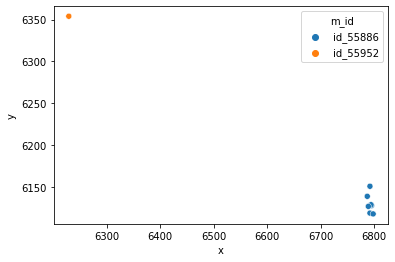

In [618]:
sns.scatterplot(data=mdots[(mdots.group=="MED1-MYC_MEF2D-VHL-G1--11--1-2_2") & (mdots.x> 6000) & abs(mdots.x<6800) & (mdots.y>6000) & (mdots.y<6900)], x="x", y="y", hue="m_id")

## aggregating

In [16]:
mdots = mdots.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in mdots.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "unique",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')

'mean'

In [17]:
# merge into a same sample
groups = mdots.groupby("m_id")
counts = groups['image'].count()
mmdots = groups.agg(grouping)
mmdots['counts'] = counts
mmdots = mmdots[mmdots['counts']>1]
mmdots.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mmdots.columns]
#rename colors
mmdots['class'] = [i[0] if len(i)==1 else "cobinding" for i in mmdots["class_unique"]]
mmdots = mmdots.drop(columns="class_unique")
mdots = mmdots

In [19]:
mdots.to_csv('../results/'+project+'/'+version+'_aggregated_green.csv')

In [20]:
mred = fish.colocalize(dots[dots['class']=='red'], distance_scale=1.2)

mred = mred.drop(columns=["parent_id", "id", 'count_red', 'count_green', "filename"])
grouping = {i: "mean" for i in mred.columns}
grouping.update({
    "image": "first",
    "z": ["mean", "min", "max"],
    'area': ["sum", "min", "max"],
    "class": "first",
    "group" : "first",
    "exp" : "first",
    "treat" : "first",
    "part" : "first",
    "mean_red" : ["mean", "var"],
    "mean_green" : ["mean", "var"],
    "mean_dapi" :["mean", "var"],
    "pixsum_red" : "sum",
    "pixsum_green" : "sum",
    "pixsum_dapi" : "sum",
    "sum_red" : "sum",
    "sum_green" : "sum",
    "sum_dapi" : "sum",
})
grouping.pop('m_id')

# merge into a same sample
groups = mred.groupby("m_id")
counts = groups['image'].count()
mred = groups.agg(grouping)
mred['counts'] = counts
mred = mred[mred['counts']>1]
mred.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mred.columns]

MEF2D-MEF2C-VHL-G1--28--2-5


/home/jeremie/genepy/genepy/imaging/fish.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdot[mergedidcol]=None
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


MEF2D-MEF2C-VHL-G1--28--4-2
MED1-MYC_MEF2D-DMSO-G1--13--3-1
MED1-MYC_MEF2D-DMSO-G1--13--1-3
MEF2C-MYC_MEF2D-VHL-G1--31--1-1
MEF2D-MYC_MEF2D-VHL-G1--5--1-1_2
MEF2C-MYC_MEF2D-DMSO-G1--12--4-7
MEF2D-MEF2C-VHL-G1--28--4-1
MED1-MYC_MEF2D-VHL-G1--11--2-2_2
MEF2D-MEF2C-VHL-G1--28--4-4
MED1-MYC_MEF2D-VHL-G1--11--6-3_2
MEF2C-MYC_MEF2D-DMSO-G1--12--1-1_1
MEF2C-MYC_MEF2D-DMSO-G1--12--2-1_1
MEF2D-MYC_MEF2D-DMSO-G1--4--9-1
MEF2D-MEF2C-VHL-G1--28--1-1
MEF2D-MYC_MEF2D-DMSO-G1--4--5-1
MED1-MYC_MEF2D-DMSO-G1--13--2-2_2
MEF2D-MEF2C-DMSO-G1--8--2-4_1
MEF2D-MYC_MEF2D-VHL-G1--5--2-3
MEF2D-MYC_MEF2D-DMSO-G1--1--1-2_2
MEF2D-MYC_MEF2D-VHL-G1--5--4-2_1
MEF2C-MYC_MEF2D-DMSO-G1--12--4-6
MEF2C-MYC_MEF2D-VHL-G1--28--2-1
MEF2C-MYC_MEF2D-VHL-G1--26--2-2
MEF2D-MYC_MEF2D-VHL-G1--5--4-3_1
MEF2D-MEF2C-DMSO-G1--8--4-7
MED1-MYC_MEF2D-VHL-G1--11--5_2
MEF2D-MEF2C-DMSO-G1--8--2-1
MED1-MYC_MEF2D-DMSO-G1--13--2-4
MEF2C-MYC_MEF2D-DMSO-G1--12--4-2
MEF2D-MEF2C-VHL-G1--28--2-4
MEF2D-MYC_MEF2D-DMSO-G1--4--5-3
MEF2C-MYC_MEF2D-DMSO-G

In [22]:
mred.to_csv('../results/'+project+'/'+version+'_aggregated_red.csv')

In [ ]:
#todo: tocode
def aggregate(data, todrop, groupby, countcol, default_agg, optional_agg, mincount):
    cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id", "filename"])

    grouping = {i: "first" for i in cells.columns}
    grouping.update({
        "area": ["sum","min","max"],
        "x": "mean",
        "y": "mean",
        "z": ["max", "min"],
        "count_red": "sum",
        "count_green": "sum",
    })
    groups = cells.groupby('group')
    counts = groups['image'].count()
    mcells = groups.agg(grouping)
    mcells['counts'] = counts
    mcells = mcells[mcells['counts']>1]
    mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

In [23]:
cells = cells.drop(columns=["max_red", "max_green", "max_dapi", "mean_red", "mean_green", "mean_dapi", "min_red", "min_green", "min_dapi", "pixsum_red", "pixsum_green", "pixsum_dapi", "range_red", "range_green", "range_dapi", "std_red", "std_green", "std_dapi", "sum_red", "sum_green", "sum_dapi", "sum2_red", "sum2_green", "sum2_dapi", "parent_id", "id"])

grouping = {i: "first" for i in cells.columns}
grouping.update({
    "area": ["sum","min","max"],
    "x": "mean",
    "y": "mean",
    "z": ["max", "min"],
    "count_red": "sum",
    "count_green": "sum",
})
groups = cells.groupby('group')
counts = groups['image'].count()
mcells = groups.agg(grouping)
mcells['counts'] = counts
mcells = mcells[mcells['counts']>1]
mcells.columns = [i[0] if "first" in i[1] else '_'.join(i) for i in mcells.columns]

## compute differences (number/surface/max/min/mean) across cells

In [80]:
folder = '../results/'+project+'/plots_'+version+'/'
! mkdir $folder

### text

In [761]:
# compute difference in signal strength between cells &  between conditions across cells
strength = {}
for k in set(mdots.exp):
    print('\n______________________________')
    print(k)
    for val in ['mean_red_mean', 'mean_green_mean','area_sum',  'sum_green_sum',  'sum_red_sum']:
        print(val)
        a = []
        for e in ['DMSO', 'VHL']:
            print('\n')
            print(e)
            d = mdots[(mdots.exp==k)&(mdots.treat==e)]
            e = pd.DataFrame([
                [d[d['class']=="cobinding"][val].mean(), d[d['class']=="cobinding"][val].var()**(1/2)],
                [d[d['class']=="green"][val].mean(), d[d['class']=="green"][val].var()**(1/2)],
                [d[d['class']=="red"][val].mean(), d[d['class']=="red"][val].var()**(1/2)]
            ], columns=['mean','var'], index=["obs_cob", "obs_green", "obs_red"])
            print(e)
            a.append(e)
        strength[k] = e
        print("\nchange (VHL/DMSO)\n"+str(a[1]['mean']/a[0]['mean']))


______________________________
MEF2D-MYC_MEF2D
mean_red_mean


DMSO
                  mean          var
obs_cob    4660.493879  2422.369420
obs_green   777.476722   626.104495
obs_red    4966.885209  1692.117184


VHL
                  mean          var
obs_cob    1961.582006          NaN
obs_green   209.067414   155.774133
obs_red    3394.720670  1737.125377

change (VHL/DMSO)
obs_cob      0.420896
obs_green    0.268905
obs_red      0.683471
Name: mean, dtype: float64
mean_green_mean


DMSO
                  mean          var
obs_cob    1906.983049  1083.982120
obs_green  2425.551183   867.814683
obs_red     264.301220   213.872788


VHL
                  mean         var
obs_cob     312.162210         NaN
obs_green  1803.546091  697.961291
obs_red      43.301159   71.623501

change (VHL/DMSO)
obs_cob      0.163694
obs_green    0.743561
obs_red      0.163833
Name: mean, dtype: float64
area_sum


DMSO
                   mean           var
obs_cob    2.124848e+06  1.305772e+06
obs_gree

In [ ]:
- MEF2C MEF2D_MYC number of green dots should not change or go up
- number of cells/ images

- we should see colocalization in VHL.

In [75]:
set(res.exp)

{'MED1-MYC_MEF2D', 'MEF2C-MYC_MEF2D', 'MEF2D-MEF2C', 'MEF2D-MYC_MEF2D'}

In [780]:
res[(res.exp=="MEF2D-MEF2C")&(res.treat=="DMSO")&(res['class']=="green")]

,image,parent_id,id,area,x,y,z,class,count_red,count_green,...,sum_green,sum_dapi,sum2_red,sum2_green,sum2_dapi,filename,group,exp,treat,part
171216,8,5,6,20577,5453,2260,1275,green,0,0,...,22951.0,31609.0,5658052.0,25902195.0,48261849.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--1-1,MEF2D-MEF2C,DMSO,1-1
171225,8,11,12,25476,5445,2242,1360,green,0,0,...,39479.0,36893.0,7169117.0,61429355.0,53006069.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--1-1,MEF2D-MEF2C,DMSO,1-1
171232,8,9,10,45074,5418,2189,1445,green,0,0,...,71918.0,66718.0,10535453.0,125430806.0,103978460.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--1-1,MEF2D-MEF2C,DMSO,1-1
171233,8,9,11,23516,4776,3398,1445,green,0,0,...,24144.0,32359.0,132342.0,24765258.0,46721777.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--1-1,MEF2D-MEF2C,DMSO,1-1
171237,8,6,7,75450,5424,2201,1530,green,0,0,...,126829.0,107368.0,22205989.0,255322195.0,163752444.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--1-1,MEF2D-MEF2C,DMSO,1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237604,8,6,7,24496,8488,4614,9350,green,0,0,...,46753.0,131266.0,74349469.0,90734427.0,696538032.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--4-7,MEF2D-MEF2C,DMSO,4-7
237610,8,8,9,15677,8170,3959,9435,green,0,0,...,30227.0,72292.0,84155568.0,58279559.0,328742420.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--4-7,MEF2D-MEF2C,DMSO,4-7
237627,8,9,10,17637,7950,5884,9690,green,0,0,...,31736.0,71529.0,170149830.0,56600946.0,285382393.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--4-7,MEF2D-MEF2C,DMSO,4-7
237633,8,8,9,15677,8185,4038,9775,green,0,0,...,22870.0,60071.0,52247147.0,33243466.0,226555945.0,MEF2D-MEF2C-DMSO-G1,MEF2D-MEF2C-DMSO-G1--8--4-7,MEF2D-MEF2C,DMSO,4-7


In [40]:
# compute difference in number/surface/max/min/mean(val) of green /red across cells and cobindings
data = {}
typ = [("sum_green_sum", "green sum"), ('sum_red_sum', "red sum"), ('mean_red_mean', "red mean"), ('mean_green_mean', "green mean"), ("area_sum", "size")]
for k in set(mdots.exp):
    a = []
    print(k)
    print('______________________________\n')
    at = pd.DataFrame()
    
    for t in ['DMSO', 'VHL']:
        print(t)
        d = mdots[(mdots.exp==k)&(mdots.treat==t)]
        
        a = pd.DataFrame()
        b = pd.DataFrame()
        print("\ncount greens per cell:")
        e = [len(d[(d["group"]==cell)&(d['class']=="green")]) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="red")]) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [len(d[(d["group"]==cell)&(d['class']=="cobinding")]) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "counts"
        a['cond'] = t
        at = at.append(a)
        
        # TOTAL signal
        
        b = pd.DataFrame()
        print("\ntotal signal greens per cell:")
        e = [sum(d[(d["group"]==cell)&(d['class']=="green")]['sum_green_sum']) for cell in set(d.group)]
        print(min(e))
        print(np.mean(e), np.sqrt(np.var(e)))
        
        b["color"] = ['on green']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="red")]['sum_red_sum']) for cell in set(d.group)]
        b["color"] = ['on red']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        b = pd.DataFrame()
        e = [sum(d[(d["group"]==cell)&(d['class']=="cobinding")]['sum_green_sum']) for cell in set(d.group)]
        b["color"] = ['on coloc']*len(e)
        b['signal'] = e
        a = a.append(b)
        
        a['type'] = "total sum"
        a['cond'] = t
        at = at.append(a)
        
        for (col,name) in typ:
            print(name)
            a = pd.DataFrame()
            print('\nsignal in green:')
            e = d[d['class']=="green"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on green"
            a = a.append(b)
            
            print('\nsignal in red:')
            e = d[d['class']=="red"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] =  e
            b['color'] = "on red"
            a = a.append(b)

            print('\nsignal in cobinding:')
            e = d[d['class']=="cobinding"][col].tolist()
            print(np.mean(e), np.sqrt(np.var(e)))
            
            b = pd.DataFrame()
            b['signal'] = e
            b['color'] = "on coloc"           
            print('\n\n')
            a = a.append(b)
            a['type']=name
            a['cond'] = t
            at = at.append(a)
        print('____________\n')
    data[k] = at.reset_index(drop=True)

MED1-MYC_MEF2D
______________________________

DMSO

count greens per cell:
219
316.38461538461536 86.21175938131236

total signal greens per cell:
87116231.0
177826204.46153846 80415999.03899603
green sum

signal in green:
562057.052759543 840082.4976909771

signal in red:
109317.65789473684 303173.29851385154

signal in cobinding:
983188.125 1044106.1455036777



red sum

signal in green:
293002.4035983467 463363.554620318

signal in red:
3261910.98245614 8513827.390269868

signal in cobinding:
4174068.625 8145362.589224266



red mean

signal in green:
922.1513432467559 697.0491008672066

signal in red:
3199.79933212358 2576.209697168562

signal in cobinding:
2969.483935749003 2185.3305513783457



green mean

signal in green:
1620.013105678852 531.3719874870166

signal in red:
144.32791669453974 151.5683542886818

signal in cobinding:
1285.9065398499074 518.8437050969161



size

signal in green:
267010.9784828592 284787.93322701665

signal in red:
451744.98245614034 812688.9635589

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



count greens per cell:
0
141.34615384615384 199.96864029290123

total signal greens per cell:
0
98912056.84615384 236203274.46528265
green sum

signal in green:
699785.9804081633 1119997.176347565

signal in red:
471562.2173913043 676299.0255332909

signal in cobinding:
2655027.25 1899235.2691343133



red sum

signal in green:
159329.8794557823 189088.3905848718

signal in red:
11049224.391304348 12346729.674999153

signal in cobinding:
11455330.5 7559336.670799975



red mean

signal in green:
777.4767220660261 626.0193053998873

signal in red:
4966.885209282614 1682.8957686310455

signal in cobinding:
4660.493879119127 2097.8334552099873



green mean

signal in green:
2425.5511830496407 867.6966045931314

signal in red:
264.3012202621159 212.70726049177324

signal in cobinding:
1906.9830488148134 938.7560534694976



size

signal in green:
229061.0367346939 246408.53504549613

signal in red:
1696157.043478261 1356045.9656996683

signal in cobinding:
2124848.0 1130831.3363926117




In [41]:
# adding chi2
for k,val in data.items():
    for i in set(val['type']):
        e = " |"
        for u in ['on green', "on red", "on coloc"]:#set(val['color']):
            a = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "DMSO")]["signal"].tolist()
            b = val[(val['type'] == i) & (val['color'] == u) & (val['cond'] == "VHL")]["signal"].tolist()
            r = ttest_ind(a, b, equal_var=False)
            e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "
        val.loc[val[val['type'] == i].index, 'type'] = i + e +"|"
    data[k] = val

<ipython-input-41-13e79356a062>:9: RuntimeWarning: divide by zero encountered in double_scalars
  e+= u + ": ("f"{np.mean(a)/np.mean(b):.1f}, "f"{r[1]:.1e}), "


<Figure size 432x288 with 0 Axes>

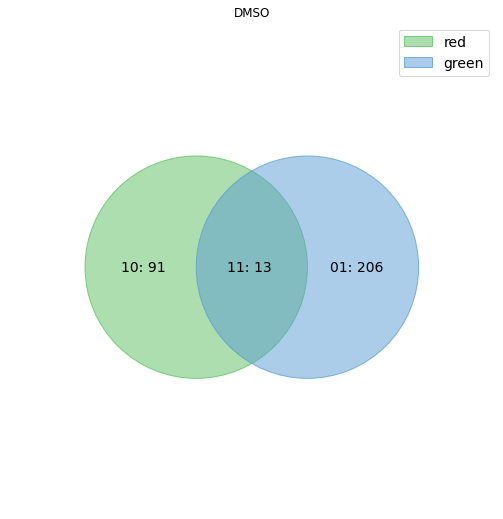

<Figure size 432x288 with 0 Axes>

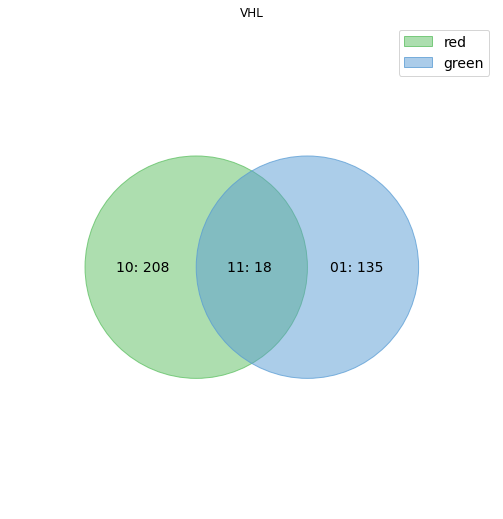

In [109]:
a = data['MEF2D-MEF2C']
counts = 'counts |on green: (1.5, 2.4e-02), on red: (0.4, 7.4e-09), on coloc: (0.7, 2.2e-01), |'
for v in ['DMSO','VHL']:
    f = int(a[(a.color=="on green")&(a.cond==v)&(a.type==counts)].signal.mean())
    e = int(a[(a.color=="on red")&(a.cond==v)&(a.type==counts)].signal.mean())
    i = int(a[(a.color=="on coloc")&(a.cond==v)&(a.type==counts)].signal.mean())
    c = f
    f = [u for u in range(f)]
    pe = [u for u in range(c, e+c)]
    c+=e
    e=pe
    e.extend([u for u in range(c, c+i)])
    f.extend([u for u in range(c, c+i)])
    plot.venn([set(e),set(f)], ["red", "green"], title=v)
    plt.savefig(folder+'MEF2D-MEF2C_venn'+v+'_mean_percell.pdf')

### plots

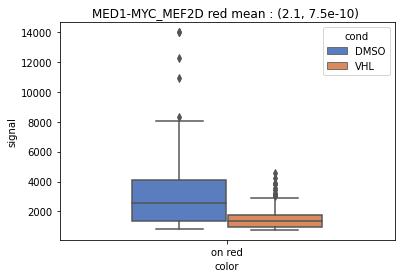

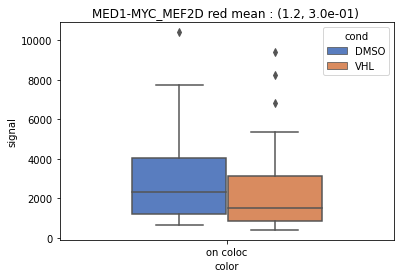

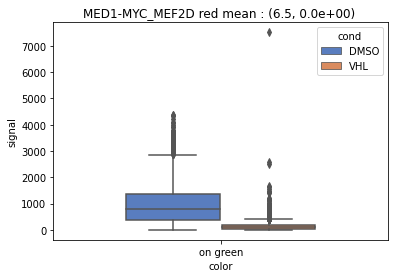

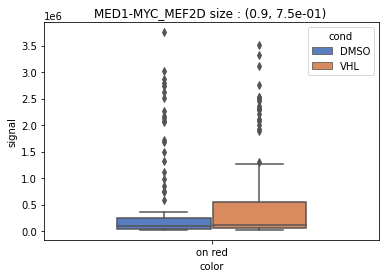

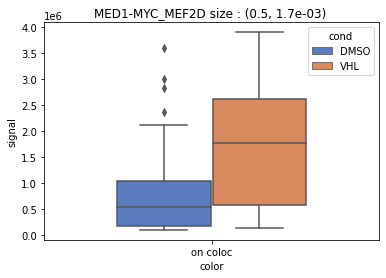

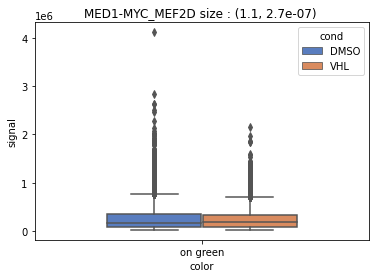

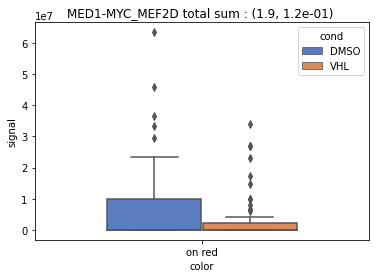

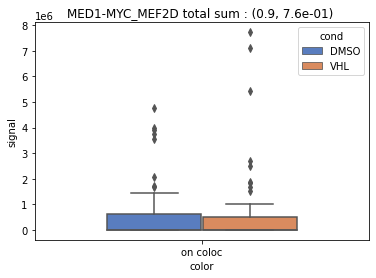

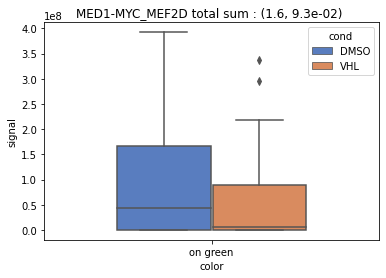

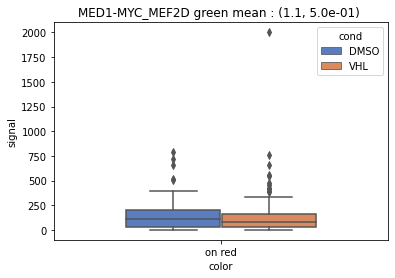

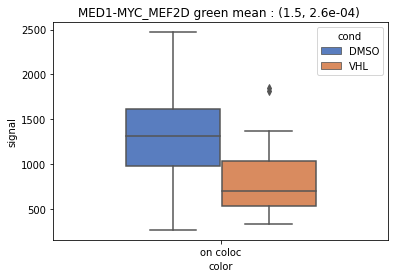

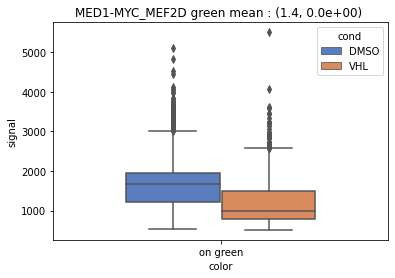

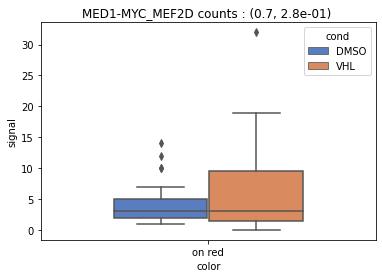

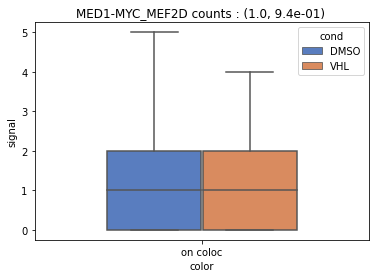

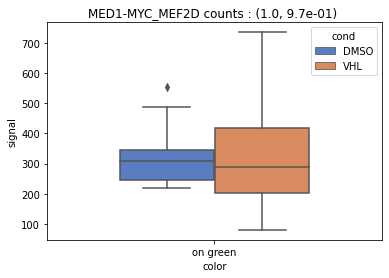

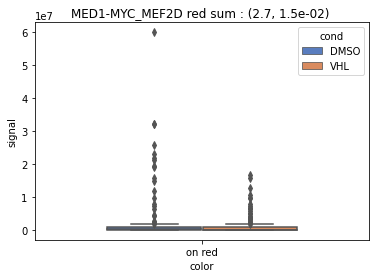

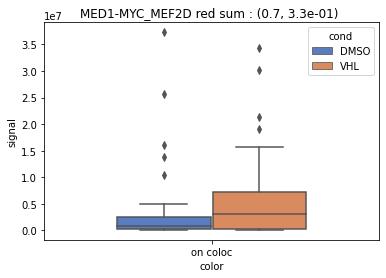

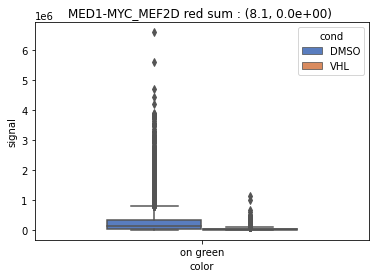

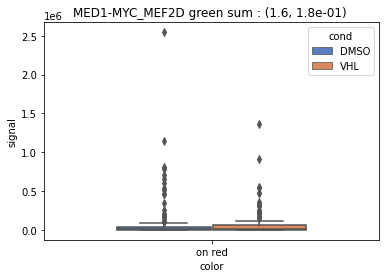

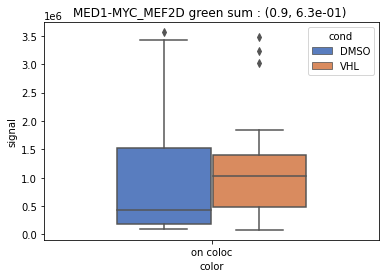

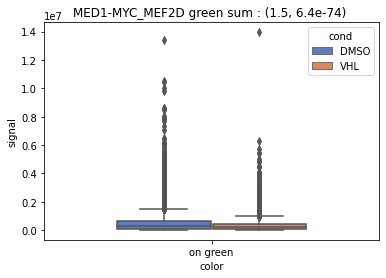

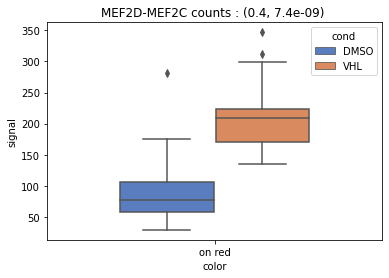

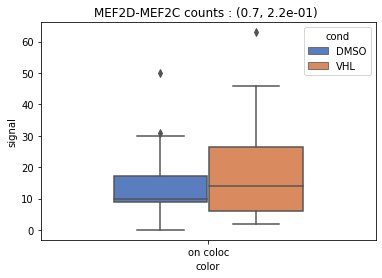

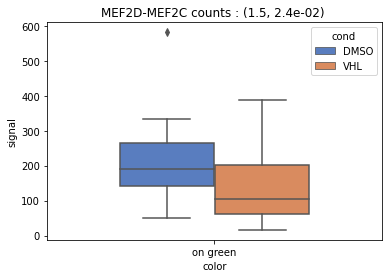

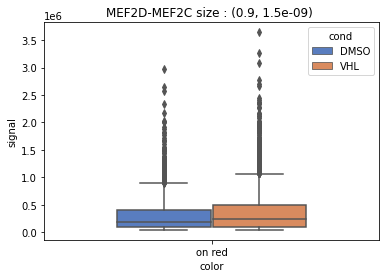

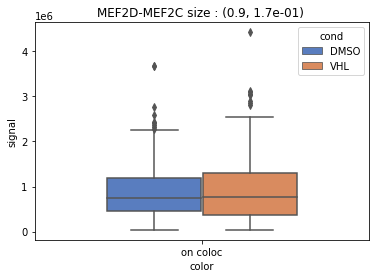

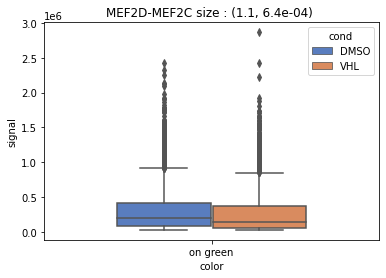

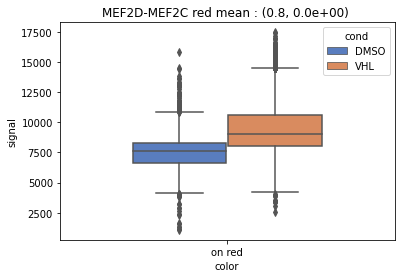

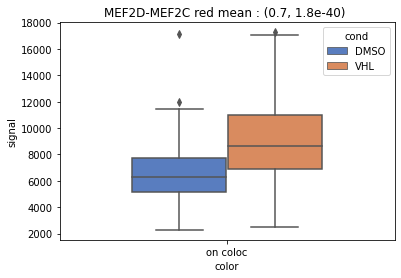

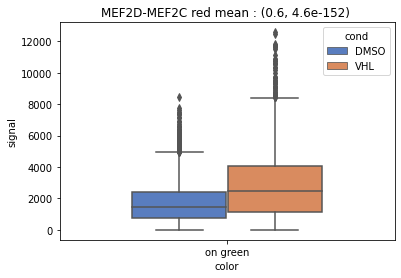

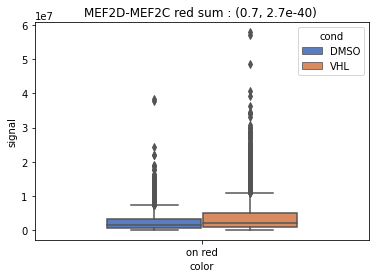

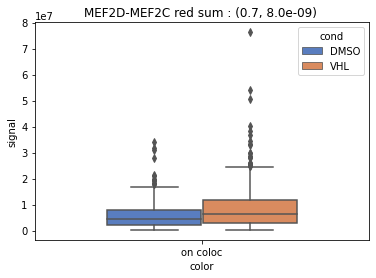

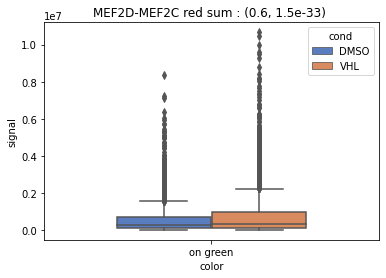

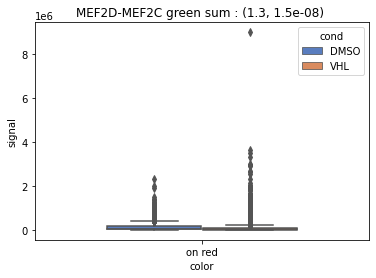

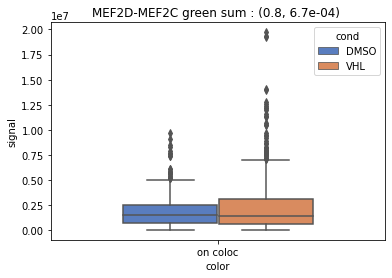

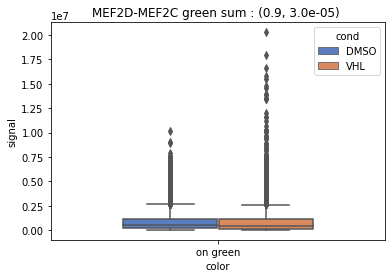

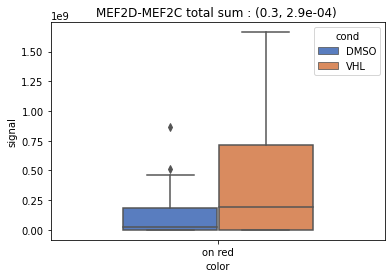

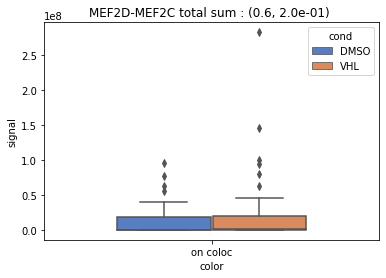

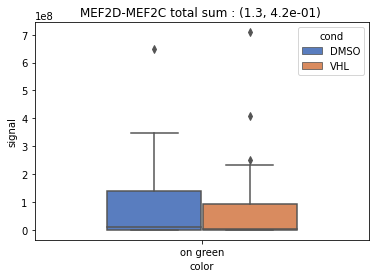

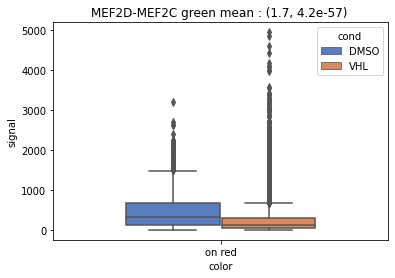

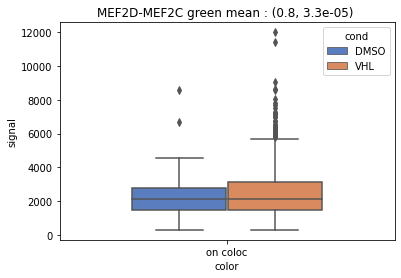

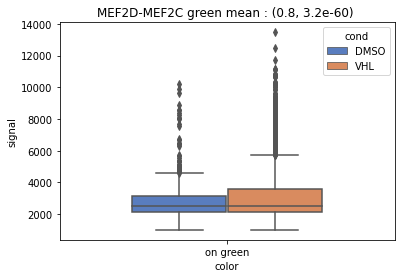

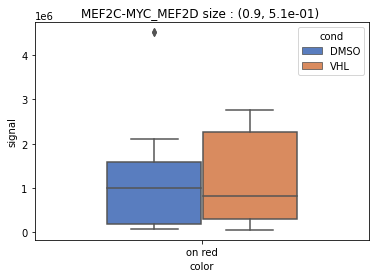

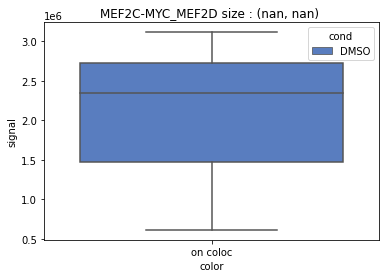

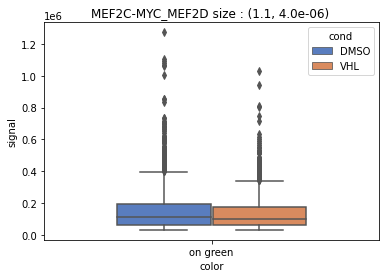

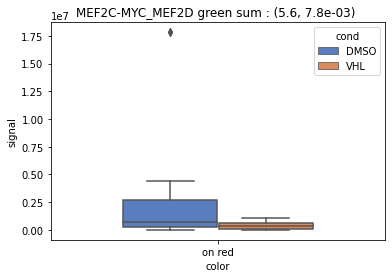

In [ ]:
for k, v in data.items():
    for l in set(v['type']):
        for m in set(v['color']):
            ax = sns.boxplot(data = v[(v['type']==l)&(v['color']==m)], x="color", y="signal", hue="cond", palette="muted")
            plt.title(k+" "+l.split('|')[0]+""+l.split(m)[-1].split('),')[0]+") ")
            
            plt.show()
            
            ax.get_figure().savefig(folder+k+'_single_'+l.split(' |')[0]+"_"+m+"_box.pdf")

In [ ]:
got 

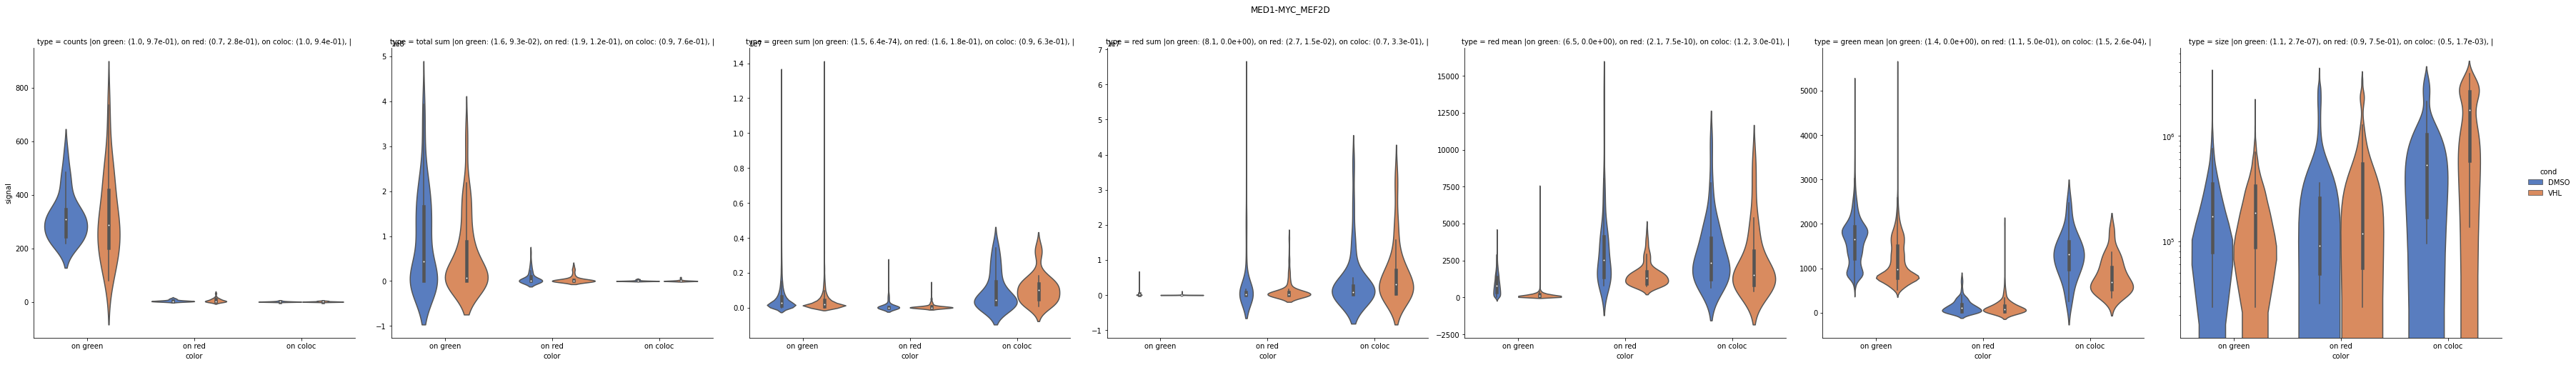

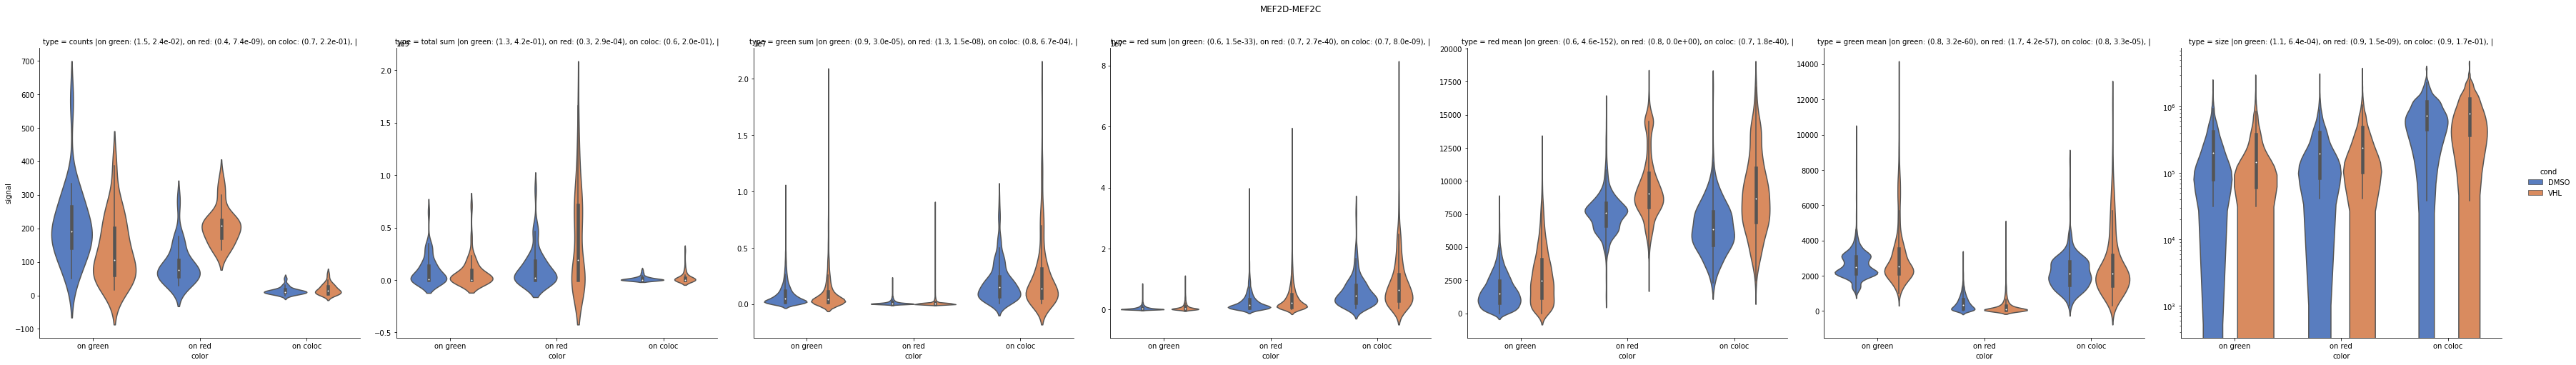

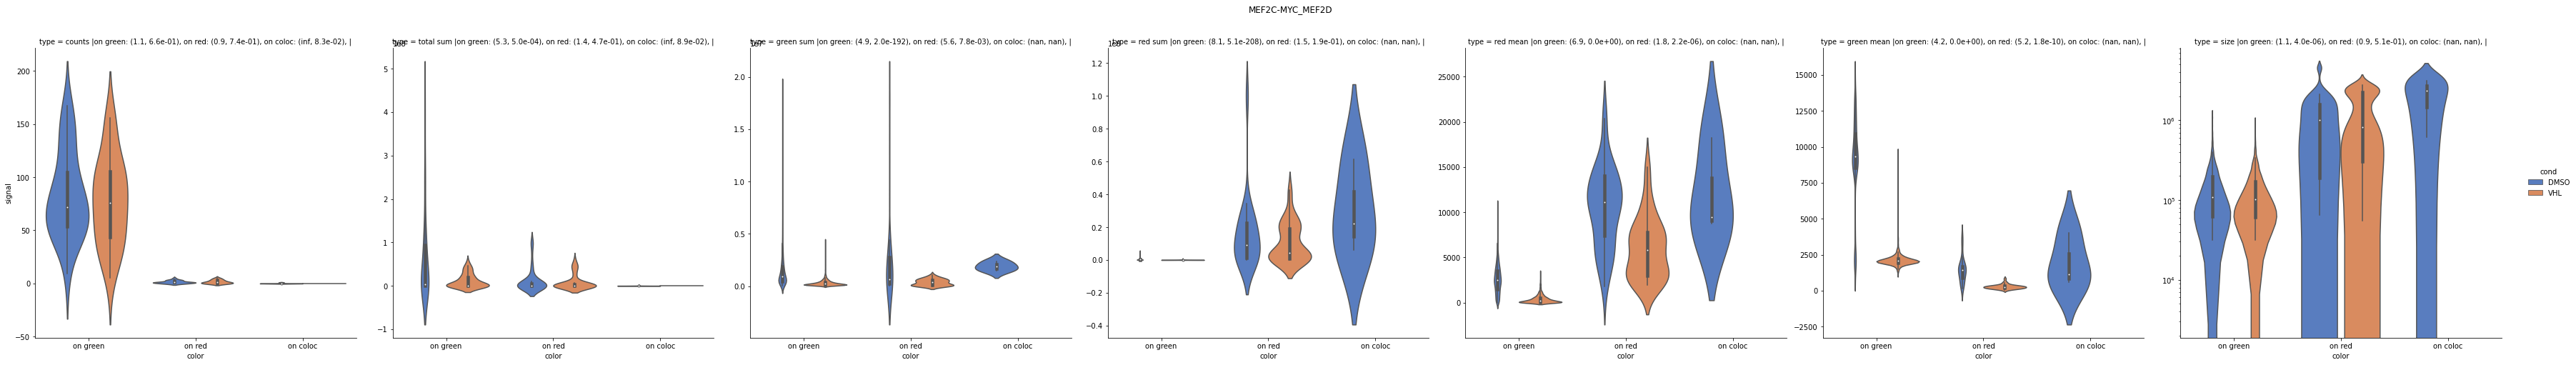

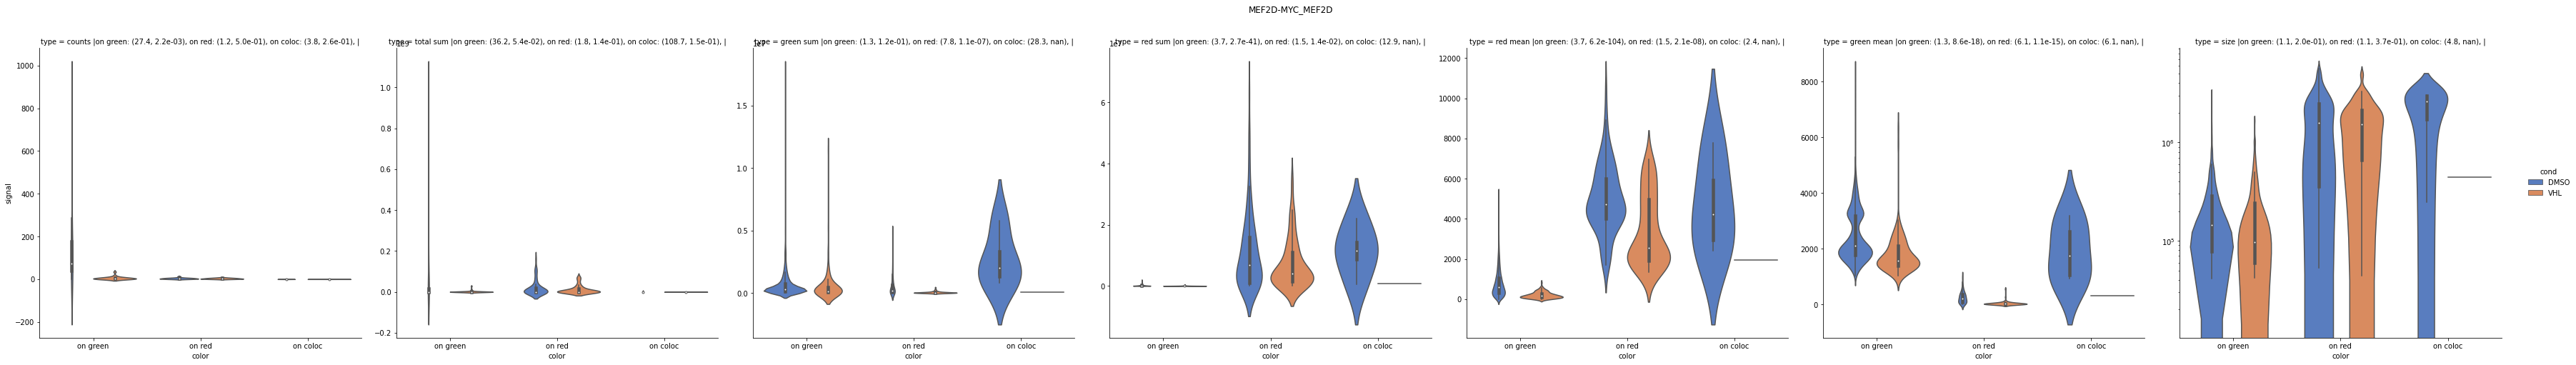

In [104]:
for k, val in data.items():
    g = sns.catplot(kind="violin", x="color", y="signal", hue="cond", col="type", data=val, palette="muted", sharey=False, height=7)
    g.fig.subplots_adjust(top=0.86)
    g.fig.suptitle(k)
    plt.yscale('log')
    plt.show()
    g.savefig(folder+k+"_violin_all.pdf")

## likelyhood of coloc compared to expectation for each experiment &  between conditions

### text

In [88]:
# compute dot likelyhood of coloc compared to expectation for each experiment &  between conditions
enrichment = {}

for k in set(mdots.exp):
    count = []
    fisher = []
    print('______________________________')
    print(k)
    for e in ['DMSO', 'VHL']:
        d = mdots[(mdots.exp==k)&(mdots.treat==e)]
        allredcount = len(d[d['class']!="green"])
        try:
            obs_cob = len(d[d['class']=="cobinding"])/allredcount
        except ZeroDivisionError:
            print('no red dot')
            continue
        obs_green = d[d['class']=="green"].area_sum.sum() * call_scale
        pred_cob = obs_green / mcells[(mcells.exp==k)&(mcells.treat==e)].area_sum.sum()
        #print(obs_cob, obs_green, pred_cob)
        count.append(obs_cob/pred_cob)
        print(e+": "+str(obs_cob/pred_cob))
        a = pred_cob*allredcount
        b = obs_cob*allredcount
        f = fisher_exact(np.array([[b, allredcount - b], [a, allredcount - a]], dtype=int))
        if f[0] is np.inf:
            f = (obs_cob/pred_cob, f[1])
        fisher.append(f)
    enrichment[k] = fisher
    print("change: "+str(count[1]/count[0]))

______________________________
MED1-MYC_MEF2D
DMSO: 9.290412257457849
VHL: 9.972698441425548
change: 1.073439817853077
______________________________
MEF2D-MEF2C
DMSO: 11.717963544036536
VHL: 10.75404633840249
change: 0.9177402112567078
______________________________
MEF2C-MYC_MEF2D
DMSO: 21.880783168647376
VHL: 0.0
change: 0.0
______________________________
MEF2D-MYC_MEF2D
DMSO: 9.295838849369968
VHL: 57.997523967051634
change: 6.239084487892392


In [89]:
enrichment

{'MED1-MYC_MEF2D': [(13.286549707602338, 8.526742357856943e-08),
  (13.40650406504065, 3.3548918227858856e-08)],
 'MEF2D-MEF2C': [(13.765392619663977, 8.900704667190583e-71),
  (11.80540436395164, 1.3076621379695384e-86)],
 'MEF2C-MYC_MEF2D': [(21.880783168647376, 0.24117647058823483), (nan, 1.0)],
 'MEF2D-MYC_MEF2D': [(9.295838849369968, 0.12108368652871485),
  (57.997523967051634, 1.0)]}

### plot

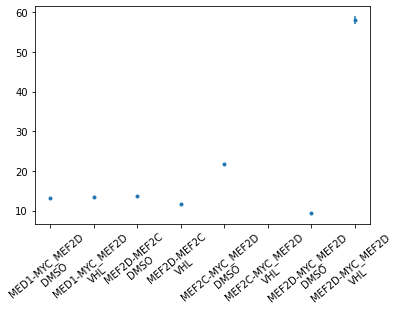

In [90]:
x=[]
y=[]
e=[]
for k, val in enrichment.items():
    x.append(k+'\nDMSO')
    y.append(val[0][0])
    e.append(val[0][1])
    x.append(k+'\nVHL')
    y.append(val[1][0])
    e.append(val[1][1])
plt.errorbar(x, y, e, linestyle='None', marker='.')
plt.xticks(rotation = 40) # Rotates X-Axis Ticks by 45-degrees
plt.savefig(folder+'enrichments.pdf')

## plot of averaged binned signal by distance from focis

In [695]:
v[['x_mean', "y_mean", "z_mean"]]

TypeError: list indices must be integers or slices, not list

In [74]:
# make a plot of averaged binned signal strength by distance from locis
dists= {}
newdists = {}
for val in set(mdots.exp):
    for e in ['DMSO', 'VHL']:
        d = dots[(dots.exp==val)&(dots.treat==e)]
        dist = []
        weight = []
        newdist = []
        m = mred[(mred.exp==val)&(mred.treat==e)]
        print(val, e)
        for i,(k, v) in enumerate(m.iterrows()):
            h.showcount(i, len(m))
            dist.append(distance_matrix(d[d['class']=="green"][['x', "y", "z"]].values, np.array([v[['x_mean', "y_mean", "z_mean"]]])).T[0].astype(float))
            weight.append(d[d['class'] == "green"]["mean_green"])
            
            a = d[d['class']=="green"][['x',"y","z","mean_green"]].values
            a[:,:3] = a[:,:3] - v[['x_mean', "y_mean", "z_mean"]].values
            newdist.append(a)
        newdists[val+e] = np.vstack(newdist)
        dists[val+e] = [np.hstack(dist), np.hstack(weight)]

MED1-MYC_MEF2D DMSO
MED1-MYC_MEF2D VHL
MEF2D-MEF2C DMSO
MEF2D-MEF2C VHL
MEF2C-MYC_MEF2D DMSO
MEF2C-MYC_MEF2D VHL
MEF2D-MYC_MEF2D DMSO
MEF2D-MYC_MEF2D VHL


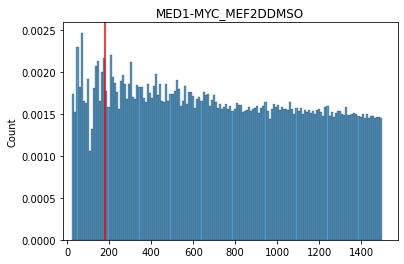

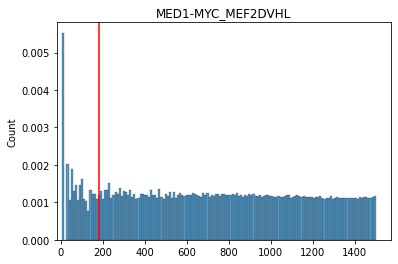

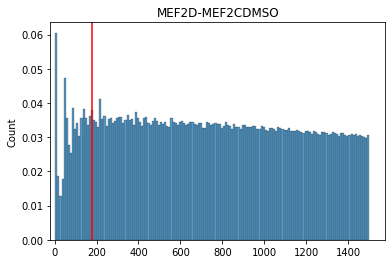

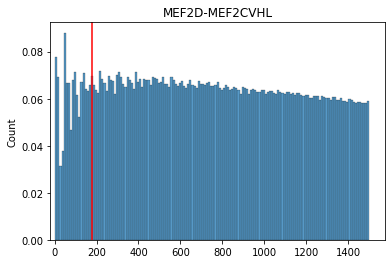

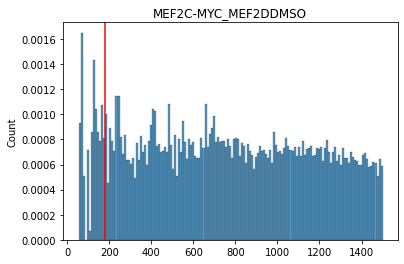

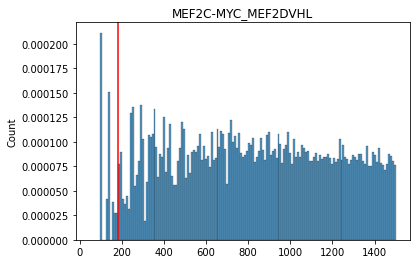

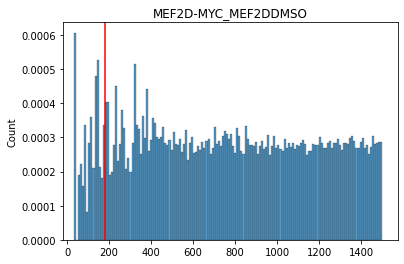

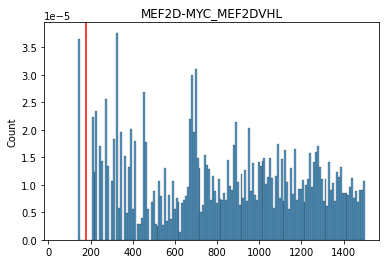

In [105]:
size=1500
bins = 150
defa = size/bins
for k, v in dists.items():
    plt.title(k)
    scale = ((4.19*(defa+v[0][v[0]<size]))**3)-((4.19*(v[0][v[0]<size]))**3)
    ax = sns.histplot(x=v[0][v[0]<size], weights=v[1][v[0]<size]/scale, bins=bins, fill=True)
    plt.axvline(x=180, color="red")
    ax.set(xlim=(-20,None))
    plt.show()
    ax.get_figure().savefig(folder+k+'_1D_distances_from_red.pdf')

In [719]:
v[1]

array([  -363.4,   7575.4,    510. , 138969. ])

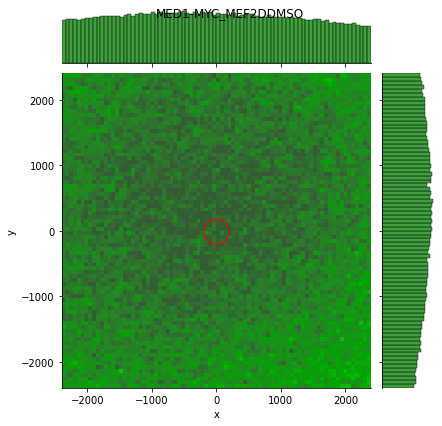

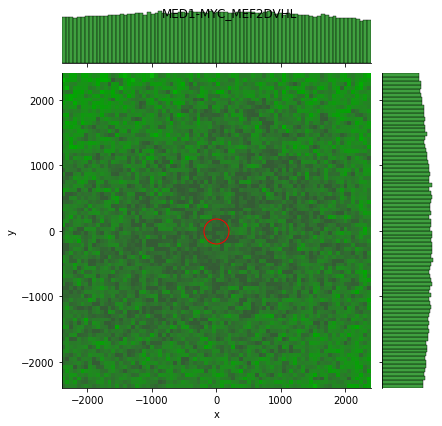

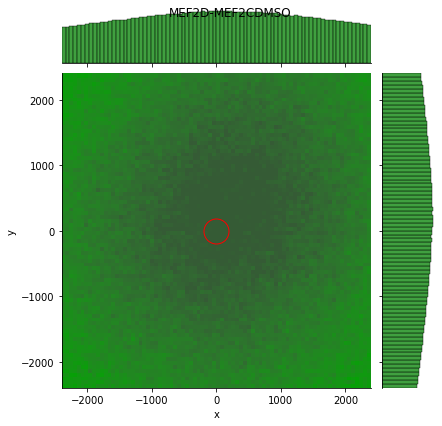

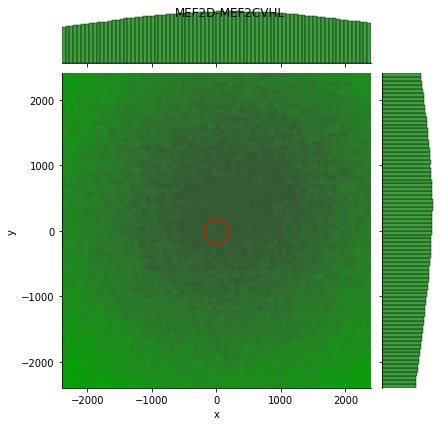

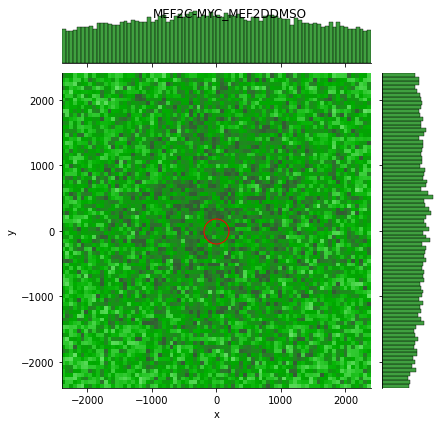

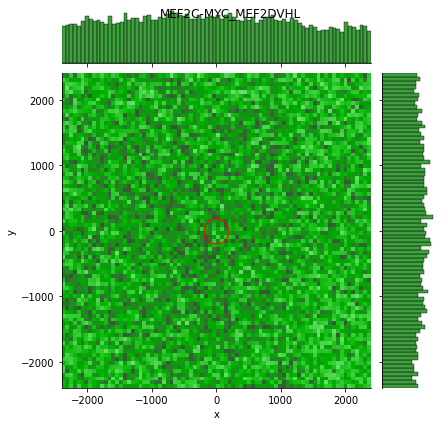

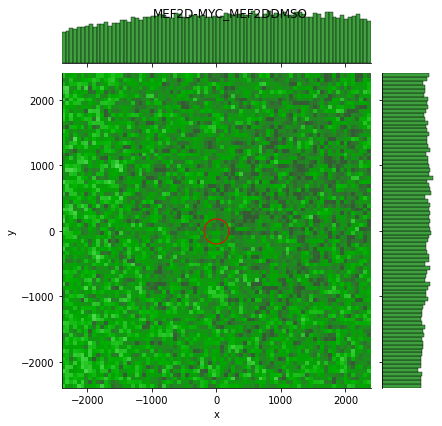

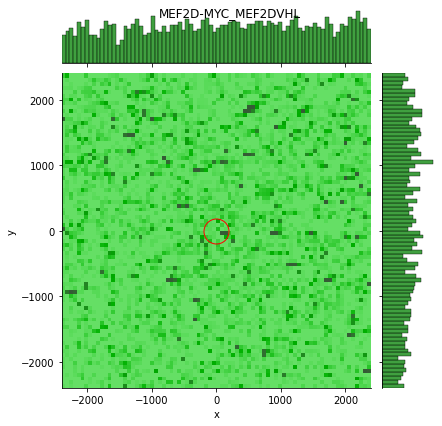

In [106]:
size=2400
bins=80
s = 25
for k, v in newdists.items():
    v = pd.DataFrame(data=v, columns=['x','y','z','sum_green'])
    p = sns.jointplot(data=v[(abs(v.x)<size) & (abs(v.y)<size) & (abs(v.z)<size)], x="x", y="y",  kind="hist", weights=v[(abs(v.x)<size) & (abs(v.y)<size)& (abs(v.z)<size)].sum_green/1000000, bins=bins, marginal_kws=dict(bins=bins), color="green", common_norm=True, pmax=.9, thresh=None)
    # gridsize=50, kind="hex", marginal_kws=dict(bins=50))
    # hue="sum_green_sum")
    x_values = [0]#, 2, 3, 4]
    y_values = [0]#, 0, 0, 0]
    p.ax_joint.plot(x_values, y_values, 'o', ms=s, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=1)
    p.fig.suptitle(k)
    plt.show()
    p.savefig(folder+k+'_2D_distances_from_red.pdf')

In [ ]:
# apply plot to old data from juliana    

In [ ]:
# make a nice fake plot
sns.plot()